In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [2]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [5]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/emodb/wav/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[5]
        if emotion=='W':
          e='anger'
        if emotion=='L':
          e='boredom'
        if emotion=='E':
          e='disgust'
        if emotion=='A':
          e='fear'
        if emotion=='F':
          e='happiness'
        if emotion=='T':
          e='sadness'
        if emotion=='N':
          e='neutral'
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
        x.append(feature)
        y.append(e)
    return train_test_split(np.array(x), y, test_size=test_size)

In [63]:
#Load the data and extract features for each sound file
def y_check(test_size=0.2):
    y = []
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/emodb/wav/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[5]
        if emotion=='W':
          e='anger'
        if emotion=='L':
          e='boredom'
        if emotion=='E':
          e='disgust'
        if emotion=='A':
          e='fear'
        if emotion=='F':
          e='happiness'
        if emotion=='T':
          e='sadness'
        if emotion=='N':
          e='neutral'
        y.append(e)
    return y

In [106]:
labels = y_check()

In [107]:
yy = y_check()

In [108]:
yy = ['anger', 'boredom', 'disgust', 'fear', 'happiness', 'neutral', 'sadness']

In [111]:
df = pd.DataFrame(labels, columns =['emo'])
df

,emo
0,happiness
1,neutral
2,anger
3,happiness
4,neutral
...,...
530,boredom
531,sadness
532,sadness
533,anger


In [114]:
c = df.describe()
c

,emo
count,535
unique,7
top,anger
freq,127


In [115]:
df.groupby('emo').size()

emo
anger        127
boredom       81
disgust       46
fear          69
happiness     71
neutral       79
sadness       62
dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

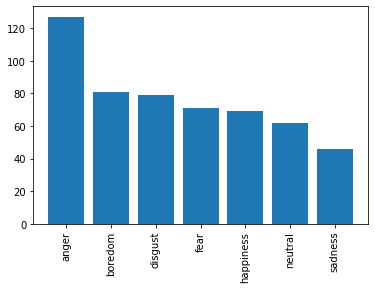

In [112]:
df['emo'].unique()
plt.bar(yy,df.emo.value_counts())
plt.xticks(rotation=90)

In [6]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00067139  0.00308228  0.00253296 ... -0.00231934 -0.00186157
 -0.00186157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04  9.1552734e-05  3.9672852e-04 ... -9.1552734e-05
 -2.1362305e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -1.5258789e-04 ... -3.9672852e-04
 -4.5776367e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00097656 -0.00106812 -0.00085449 ... -0.00024414 -0.00018311
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00036621  0.00015259 ... -0.0032959  -0.00250244
 -0.00180054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00335693 -0.003479   -0.00335693 ...  0.00057983  0.00042725
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.000

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.02145386 -0.02145386 -0.02145386 ... -0.01275635 -0.01101685
 -0.00869751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  9.1552734e-05  9.1552734e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00027466 0.00057983 0.00073242 ... 0.00012207 0.00027466 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00183105  0.00228882  0.00228882 ... -0.02359009 -0.02404785
 -0.02404785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00079346 -0.00094604 -0.00088501 ...  0.00469971  0.00466919
  0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[1.2207031e-04 3.0517578e-04 2.4414062e-04 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.01068115 -0.01068115 -0.01037598 ... -0.00057983 -0.00146484
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00915527 -0.00888062 -0.00863647 ... -0.02011108 -0.02111816
 -0.02087402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.103515

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.02032471 -0.01663208 -0.01199341 ...  0.01754761  0.01663208
  0.01663208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 8.2397461e-04  9.7656250e-04 -3.9672852e-04 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00036621 -0.00036621 -0.00036621 ...  0.         -0.00036621
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414 -0.00024414 -0.00076294 ... -0.00048828 -0.00048828
 -0.00125122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 9.1552734e-05 9.1552734e-05 ... 4.5776367e-04 3.0517578e-04
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.5095215e-03  8.3007812e-03  1.0437012e-02 ... -1.5258789e-04
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ... -1.5258789e-04
 -1.8310547e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00250244 -0.00161743 -0.00057983 ... -0.00027466 -0.00027466
 -0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  9.1552734e-05 -9.1552734e-05 ...  1.2207031e-04
  3.0517578e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00057983 -0.00027466 -0.00027466 ...  0.         -0.00027466
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00094604 -0.0010376  -0.00119019 ... -0.00045776 -0.00039673
 -0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00299072  0.00271606  0.00326538 ... -0.00491333 -0.00598145
 -0.00543213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05 -3.3569336e-04 ...  3.9672852e-04
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00256348  0.0039978  ... -0.01589966 -0.01663208
 -0.01461792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.01062012  0.01010132  0.00994873 ...  0.00082397  0.
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00012207  0.         ... -0.00039673 -0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00161743  0.00161743  0.00167847 ... -0.00161743 -0.00067139
 -0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01501465 0.01425171 0.01501

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00180054 -0.00088501 -0.00088501 ...  0.00027466  0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[2.4414062e-04 5.7983398e-04 1.5258789e-04 ... 2.1362305e-04 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00073242  0.00073242  0.         ... -0.00466919 -0.00540161
 -0.00588989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00027466 -0.00

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.003479   -0.00338745 -0.00338745 ... -0.0017395  -0.00164795
 -0.00183105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00027466 -0.00027466  0.00012207 ... -0.00146484 -0.0017395
 -0.00189209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00201416 0.00222778 0.00241089 ... 0.02230835 0.02230835 0.02331543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00064087  0.00021362  0.00

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00021362 0.         0.00067139 ... 0.00021362 0.00021362 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414  0.00024414  0.         ... -0.00540161 -0.00512695
 -0.00488281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.01062012  0.01086426  0.01037598 ...  0.00125122  0.00073242
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+0

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.02566528 -0.04046631  0.01565552 ... -0.00021362 -0.00042725
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01745605 0.01806641 0.01889038 ... 0.01034546 0.01074219 0.01013184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.6621094e-04  1.8310547e-04 -2.4414062e-04 ...  6.1035156e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0014343

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00030518 -0.00061035 -0.00082397 ... -0.00262451 -0.01126099
 -0.00747681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.          0.00036621 ...  0.00054932  0.00076294
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00137329 -0.00415039 -0.00415039 ...  0.00027466  0.00027466
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00067139  0.003417

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00119019  0.00192261  0.00534058 ... -0.01119995 -0.01022339
 -0.01022339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00057983 -0.00048828 -0.00097656 ... -0.00036621 -0.00057983
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00134277 -0.00125122 -0.00119019 ... -0.00149536 -0.00094604
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00061035  0.001373

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00021362 -0.00042725 -0.00085449 ... -0.00042725 -0.00042725
 -0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00177002 -0.00164795 -0.00198364 ... -0.00265503 -0.00286865
 -0.00109863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00030518 -0.00064087 -0.00030518 ... -0.00289917 -0.0045166
 -0.00320435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.0005188  -0.0005188

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207 -0.00021362 -0.00012207 ... -0.00143433 -0.00137329
 -0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -1.8310547e-04 -7.9345703e-04 ... -4.8828125e-04
 -1.8310547e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00323486 -0.00338745 -0.00366211 ... -0.00012207 -0.00216675
 -0.00244141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [8]:
import time
start = time.time()
model=MLPClassifier(alpha=0.0001, batch_size=64, epsilon=1e-08, hidden_layer_sizes=(500,), learning_rate='constant',activation='logistic',solver='adam',max_iter=600)
model.fit(x_train,y_train)
end = time.time()
train_time_total=end-start
print(train_time_total)

3.5315027236938477


In [9]:
start = time.time()
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
end = time.time()
test_time_total=end-start
print(test_time_total)

Logistic-Accuracy: 75.70%
              precision    recall  f1-score   support

       anger       0.87      1.00      0.93        20
     boredom       0.70      0.70      0.70        20
     disgust       0.75      0.75      0.75         8
        fear       0.50      0.67      0.57         9
   happiness       0.78      0.70      0.74        10
     neutral       0.80      0.57      0.67        28
     sadness       0.80      1.00      0.89        12

    accuracy                           0.76       107
   macro avg       0.74      0.77      0.75       107
weighted avg       0.76      0.76      0.75       107

0.009031295776367188


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,normalize='true')
conf_matrix= pd.DataFrame(cm,columns=None)
conf_matrix.to_csv(r'D:/thesis_codes/output/confusion_matrix.csv', index = False, header=False)

In [13]:
from imblearn.metrics import specificity_score
s=specificity_score(y_test,y_pred,average='macro')
print(s)

0.9588992569540193


In [14]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict_proba(x_test)
auc=roc_auc_score(y_test, y_pred, average='macro',multi_class='ovo')
print(auc)

0.9441261967750064


In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_pred=model.predict(x_test)
p=precision_score(y_test, y_pred,average='macro')
r=recall_score(y_test, y_pred,average='macro')
f=f1_score(y_test, y_pred,average='macro')
print(p,r,f)

0.7424775707384403 0.7697278911564626 0.7491512557695458


In [16]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[1.         0.7        0.75       0.66666667 0.7        0.57142857
 1.        ]
[0.05185185 0.05059524 0.02261905 0.04047619 0.03935185 0.03333333
 0.03042328]


In [17]:
from pandas import DataFrame
C = {
     'test acc':[str(accuracy)],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'total train time':[str(train_time_total)],
     'total test time':[str(test_time_total)]}
df = DataFrame(C, columns= ['test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','total train time','total test time'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

             test acc    precision(macro)       recall(macro)  \
0  0.7570093457943925  0.7424775707384403  0.7697278911564626   

            f1(macro)  specificity(macro)          AUC(macro)  \
0  0.7491512557695458  0.9588992569540193  0.9441261967750064   

     total train time       total test time  
0  3.5315027236938477  0.009031295776367188  


In [18]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'E:\result3.csv', index = None, header=True) 
print (df)

        TPR       FPR
0  1.000000  0.051852
1  0.700000  0.050595
2  0.750000  0.022619
3  0.666667  0.040476
4  0.700000  0.039352
5  0.571429  0.033333
6  1.000000  0.030423


In [19]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[20  0  0  0  0  0  0]
 [ 0 14  0  2  0  4  0]
 [ 0  1  6  0  1  0  0]
 [ 1  0  0  6  1  0  1]
 [ 2  0  1  0  7  0  0]
 [ 0  5  1  4  0 16  2]
 [ 0  0  0  0  0  0 12]]


In [87]:
cm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([100.        ,  70.        ,  75.        ,  66.66666667,
        70.        ,  57.14285714, 100.        ])

Text(0.5, 1.0, 'accuracy of each class')

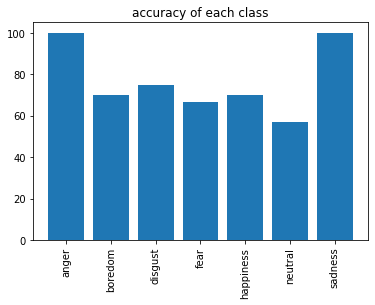

In [116]:
plt.bar(yy,cm.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'anger'),
  Text(0, 1.5, 'boredom'),
  Text(0, 2.5, 'disgust'),
  Text(0, 3.5, 'fear'),
  Text(0, 4.5, 'happiness'),
  Text(0, 5.5, 'neutral'),
  Text(0, 6.5, 'sadness')])

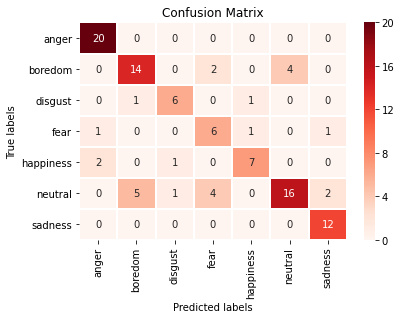

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(yy); ax.yaxis.set_ticklabels(yy);
plt.xticks(rotation=90)
plt.yticks(rotation=0)
